# Cohort  

Entendemos por Cohort, ou Coorte, um conjunto de pessoas que têm como característica comum um evento ocorrido no mesmo período. Essa pesquisa proporciona observar e estabelecer uma causa para o evento estudado, tanto na ótica prospectiva quanto retrospectiva. Sua aplicação é muito vista no Marketing, com o objetivo de segmentar e comparar grupos 

Este é um conjunto de dados transnacional que contém todas as transações ocorridas entre 12/01/2010 e 12/09/2011 para um varejo on-line sem loja registrado e com sede no Reino Unido. A empresa vende principalmente presentes exclusivos para todas as ocasiões. Muitos clientes da empresa são atacadistas.

Variables Table
Variable Name	Role	Type	Description	Units	Missing Values
InvoiceNo	ID	Categorical	a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation		no
StockCode	ID	Categorical	a 5-digit integral number uniquely assigned to each distinct product		no
Description	Feature	Categorical	product name		no
Quantity	Feature	Integer	the quantities of each product (item) per transaction		no
InvoiceDate	Feature	Date	the day and time when each transaction was generated		no
UnitPrice	Feature	Continuous	product price per unit	sterling	no
CustomerID	Feature	Categorical	a 5-digit integral number uniquely assigned to each customer		no
Country	Feature	Categorical	the name of the country where each customer resides		no

**InvoiceNo**: Número da fatura. Nominal, um número integral de 6 dígitos atribuído exclusivamente a cada transação. Se este código começar com a letra 'c', indica cancelamento.  
**StockCode**: Código do produto (item). Nominal, um número integral de 5 dígitos atribuído exclusivamente a cada produto distinto. Descrição: Nome do produto (item). Nominal.  
**Quantidade**: As quantidades de cada produto (item) por transação. Numérico.   
**InvoiceDate**: Data e hora da fatura. Numérico, o dia e a hora em que cada transação foi gerada.   
**PreçoUnitário**: Preço unitário. Numérico, preço do produto por unidade em libras esterlinas.   
**CustomerID**: Número do cliente. Nominal, um número integral de 5 dígitos atribuído exclusivamente a cada cliente.  
**País**: Nome do país. Nominal, o nome do país onde cada cliente reside.

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [5]:
def load_retail_data():
    csv_path = os.path.join("datasets/retail/", "Online Retail.xlsx")
    return pd.read_excel(csv_path)

In [6]:
df = load_retail_data()

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Temos valores nulo em `Quantity` e `CustomerID`. Na análise de Cohort, valores nulos afetam diretamente o estudo, uma vez que queremos acompanhar o comportamento dos clientes. Portanto, os dados serão reduzidos.

In [9]:
def delete_na(column):
    return df.dropna(subset=column, inplace=True)

In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


Os valores da média quando comparados com a mediana, indicam assimetria positiva (valores concentrados em localizações mais afatadas da massa de dados) em todos os casos.

### Analisando a estatística de compra por cliente

In [11]:
invoice_per_costumer = df.groupby(["CustomerID"])["InvoiceNo"].nunique().sort_values()
invoice_per_costumer.describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,4372.0,5.07548,9.338754,1.0,1.0,3.0,5.0,248.0


A média ainda é maior que a mediana, e temos o caso de haver 248 itens em um único pedido. O alerta para um outlier se mantém ligado. Muitos clientes concentram quantidades consideradas normal, independente da regra de negócio, enquanto que apenas 1/4 concentram grandes quantidades de produtos.

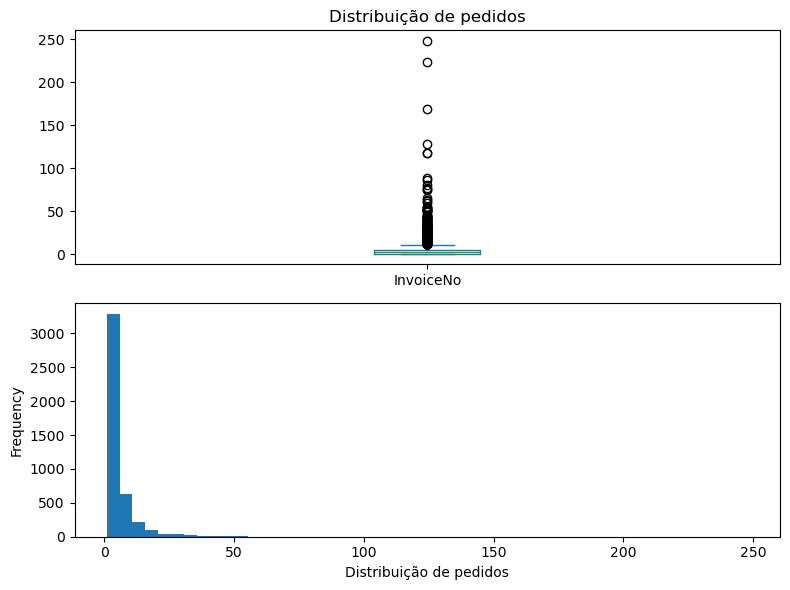

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
invoice_per_costumer.plot(kind='box', ax=axes[0], subplots=True)
invoice_per_costumer.plot(kind='hist', bins=50, ax=axes[1], subplots=True)

axes[0].set_title("Distribuição de pedidos")
axes[1].set_xlabel("Pedidos únicos", loc="center")
plt.tight_layout()

## Cohort

Para verificar quais os clientes compram com recorrência, precisamos tirar os valores duplicados. Aplicaremos uma granularidade mensal.

In [36]:
def select_features(columns):
    
    return df[columns].drop_duplicates()

In [37]:
df_cohort = select_features(columns=["CustomerID", "InvoiceNo", "InvoiceDate"])

In [39]:
df_cohort["InvoiceMonth"] = df_cohort["InvoiceDate"].dt.to_period("M")
    
df_cohort["Cohort"] = df_cohort.groupby("CustomerID")["InvoiceDate"].transform("min").dt.to_period("M")

In [40]:
df_cohort

,CustomerID,InvoiceNo,InvoiceDate,InvoiceMonth,Cohort
0,17850.0,536365,2010-12-01 08:26:00,2010-12,2010-12
7,17850.0,536366,2010-12-01 08:28:00,2010-12,2010-12
9,13047.0,536367,2010-12-01 08:34:00,2010-12,2010-12
21,13047.0,536368,2010-12-01 08:34:00,2010-12,2010-12
25,13047.0,536369,2010-12-01 08:35:00,2010-12,2010-12
...,...,...,...,...,...
541865,13777.0,581583,2011-12-09 12:23:00,2011-12,2010-12
541867,13777.0,581584,2011-12-09 12:25:00,2011-12,2010-12
541869,15804.0,581585,2011-12-09 12:31:00,2011-12,2011-05
541890,13113.0,581586,2011-12-09 12:49:00,2011-12,2010-12


In [41]:
df_cohort = df_cohort.groupby(["Cohort", "InvoiceMonth"]).agg(n_customers=("CustomerID",'nunique')).reset_index(drop=False)

df_cohort.head()

,Cohort,InvoiceMonth,n_customers
0,2010-12,2010-12,948
1,2010-12,2011-01,362
2,2010-12,2011-02,317
3,2010-12,2011-03,367
4,2010-12,2011-04,341


In [42]:
df_cohort["Period"] = (df_cohort["InvoiceMonth"] - df_cohort["Cohort"]).apply(lambda x: x.n)

df_cohort.head()

,Cohort,InvoiceMonth,n_customers,Period
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4


In [46]:
df_cohort = df_cohort.pivot_table(index="Cohort", columns="Period", values="n_customers")

In [49]:
df_cohort

Period,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_cohort = df_cohort.divide(df_cohort.iloc[:, 0], axis=0)

Period,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Matriz de Retenção')

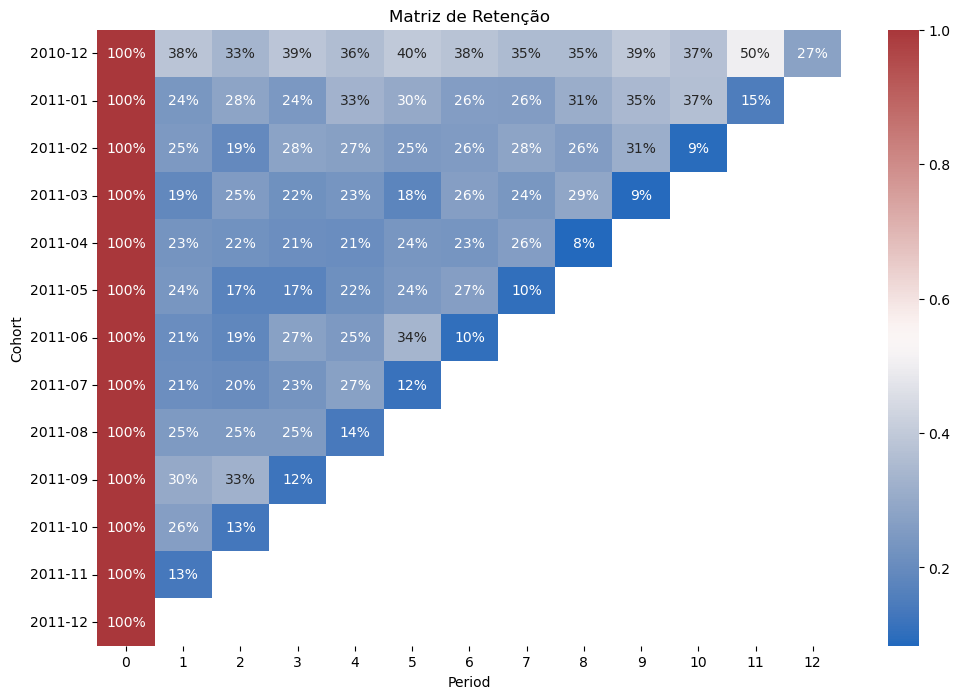

In [54]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data=df_cohort, mask=df_cohort.isnull(), annot=True, fmt=".0%", cmap="vlag")
plt.title("Matriz de Retenção")